# Feed Forward Neural Network - XOR

**XOR**: Output is 1 only when inputs are different
- (0,0) → 0
- (0,1) → 1  
- (1,0) → 1
- (1,1) → 0

This notebook builds and tains a simple feed forward neural network to learn the XOR function. </br>
The network has 2 inputs, 2 hidden neurons, and 1 output neuron. </br>
It uses linear transformation, sigmoid activation, mean squared error loss, and gradient descent for optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

## 1. Data (just 4 points!)

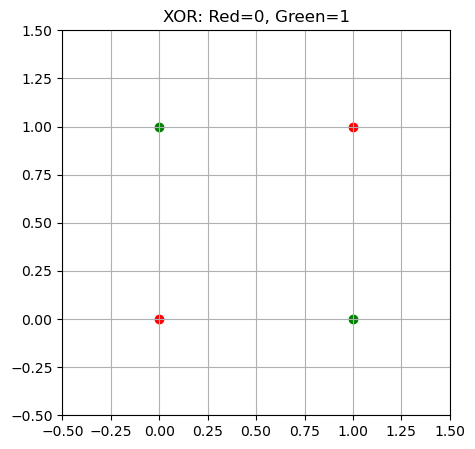

In [2]:
INPUT_DATA = np.array([[0,0], [0,1], [1,0], [1,1]]) # Input for XOR
EXP_OUTPUT_DATA = np.array([[0], [1], [1], [0]])    # Expected output for XOR

# Plot
plt.figure(figsize=(5,5))
for i in range(4):
    color = 'red' if EXP_OUTPUT_DATA[i]==0 else 'green'
    plt.scatter(INPUT_DATA[i,0], INPUT_DATA[i,1], c=color)
plt.title('XOR: Red=0, Green=1')
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()

## 2. Network: 2 inputs → 2 hidden → 1 output

```
    INPUT LAYER         HIDDEN LAYER         OUTPUT LAYER
    (2 neurons)         (2 neurons)          (1 neuron)
    
        ┌───┐    W1[0,0]    ┌───┐
        │x1 │──────────────-│h1 │─────┐
        └───┘\            / └───┘     | W2[0,0]
              \          /    +b1[0]  |
               \       /              |
                \     /             ┌───┐
                 \   /              │out│ +b2[0] -> prediction (0 or 1)
                  \ /               └───┘
                   ╳                  |
                  / \                 | W2[1,0]
                 /   \                |
                /     \               |
               /       \              |
              /         \             |
             /           \    +b1[1]  |   
        ┌───┐             \ ┌───┐     |
        │x2 │──────────────-│h2 │─────┘
        └───┘    W1[1,1]    └───┘
                              
```

**What each part does:**
- **x1, x2**: Input values (0 or 1)
- **W1**: 4 weights connecting inputs to hidden layer (2×2 matrix)
- **b1**: 2 biases for hidden neurons
- **h1, h2**: Hidden neurons (apply sigmoid activation)
- **W2**: 2 weights connecting hidden to output (2×1 matrix)
- **b2**: 1 bias for output neuron
- **out**: Final prediction (0 or 1)

In [3]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

# Initialize weights randomly
def initialize_weights():
    W1 = np.random.randn(2, 2)  # 2x2 matrix for : 2 inputs → 2 hidden
    b1 = np.zeros((1, 2))       # 1x2 matrix for : 2 bias for 2 hidden layers

    W2 = np.random.randn(2, 1)  # 2x1 matrix for : 2 hidden → 1 output
    b2 = np.zeros((1, 1))       # 1x1 matrix for : 1 bias for 1 output layer
    
    return W1, b1, W2, b2

def print_weights(W1, b1, W2, b2):
    print(f"W1: \n{W1}")
    print(f"b1: \n{b1}")
    print(f"W2: \n{W2}")
    print(f"b2: \n{b2}")


## 3. Train!

In [ ]:
# trackers
losses = []
outputs_history = []
W1_history = [] 
W2_history = []
b1_history = [] 
b2_history = [] 

epochs = 5000
W1, b1, W2, b2 = initialize_weights()

print("Starting Weights & Biases:")
print_weights(W1, b1, W2, b2)

W1_history.append(W1.copy())
W2_history.append(W2.copy())
b1_history.append(b1.copy())
b2_history.append(b2.copy())

# ITERATION
for i in range(epochs):

    # A. FORWARD PROPAGATION
    # Linear Transformation: z = INPUT_DATA x Weight + Bias
    # Activation Function: sigmoid(z)
    # Input → Hidden
    hidden = sigmoid(INPUT_DATA @ W1 + b1)
    # Hidden → Output
    output = sigmoid(hidden @ W2 + b2)  
    
    # B. BACKPROPAGATION    
    # B.1 Loss calculation: how wrong were we?
    error = EXP_OUTPUT_DATA - output
    loss = np.mean(error**2)
    # B.2 Gradient calculation: adjust weights & biases
    d_output = error * sigmoid_deriv(output)
    d_hidden = (d_output @ W2.T) * sigmoid_deriv(hidden)
    
    # B.3 Update weights and biases
    W2 += hidden.T @ d_output * 5  # learning rate = 5
    b2 += np.sum(d_output, axis=0, keepdims=True) * 5  # bias gradient
    W1 += INPUT_DATA.T @ d_hidden * 5
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * 5  # bias gradient

    # C. ANALYTICS
    if i % 100 == 0:
        losses.append(loss)
        outputs_history.append(output.copy())
        W1_history.append(W1.copy())
        W2_history.append(W2.copy())
        b1_history.append(b1.copy())
        b2_history.append(b2.copy())
    
    if i % 1000 == 0:
        print(f"Step {i}: Loss = {loss:.4f}")

Starting Weights & Biases:
W1: 
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
b1: 
[[0. 0.]]
W2: 
[[ 0.86540763]
 [-2.3015387 ]]
b2: 
[[0.]]
Step 0: Loss = 0.2567
Step 1000: Loss = 0.0003
Step 2000: Loss = 0.0001
Step 3000: Loss = 0.0001
Step 4000: Loss = 0.0001


## 4. Results

In [5]:
print("Final Results:")
print("Input  | Target | Predicted | Rounded | ERROR")
print("-" * 50)
for i in range(4):
    error_i = error[i,0]**2
    print(f"{INPUT_DATA[i]}  |   {EXP_OUTPUT_DATA[i,0]}    |   {output[i,0]:.3f}   |    {round(output[i,0])}    |  {error_i:.4f}")

Final Results:
Input  | Target | Predicted | Rounded | ERROR
--------------------------------------------------
[0 0]  |   0    |   0.007   |    0    |  0.0000
[0 1]  |   1    |   0.993   |    1    |  0.0000
[1 0]  |   1    |   0.993   |    1    |  0.0000
[1 1]  |   0    |   0.008   |    0    |  0.0001


## 5. Visualize Learning

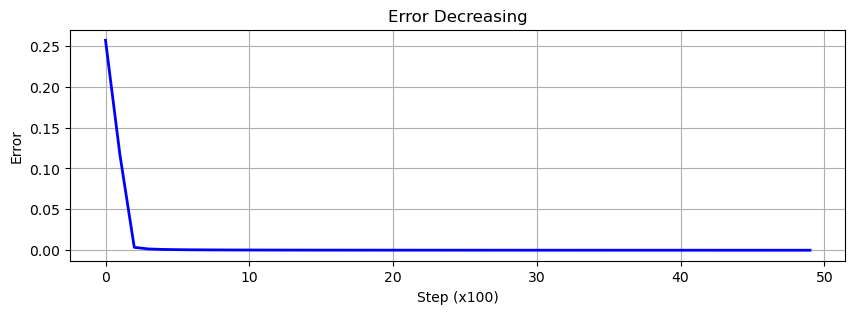

In [6]:
# Loss going down
plt.figure(figsize=(10, 3))
plt.plot(losses, 'b-', linewidth=2)
plt.xlabel('Step (x100)')
plt.ylabel('Error')
plt.title('Error Decreasing')
plt.grid(True)
plt.show()

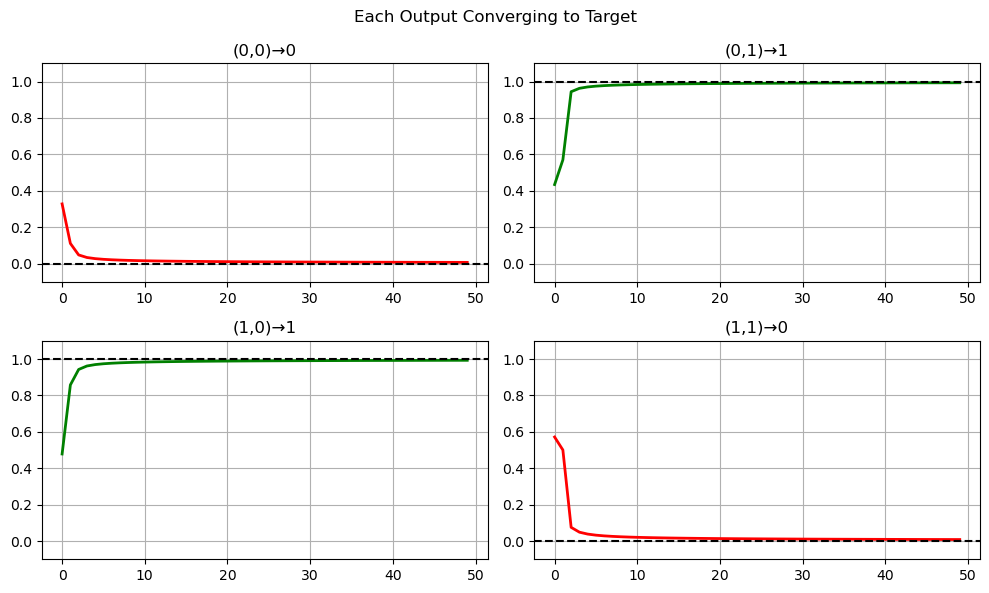

In [7]:
# Each output converging to target
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
labels = ['(0,0)→0', '(0,1)→1', '(1,0)→1', '(1,1)→0']
targets = [0, 1, 1, 0]

for idx, ax in enumerate(axes.flat):
    values = [o[idx,0] for o in outputs_history]
    ax.plot(values, 'g-' if targets[idx]==1 else 'r-', linewidth=2)
    ax.axhline(targets[idx], color='black', linestyle='--')
    ax.set_title(labels[idx])
    ax.set_ylim(-0.1, 1.1)
    ax.grid(True)

plt.suptitle('Each Output Converging to Target')
plt.tight_layout()
plt.show()

In [8]:
# What each hidden neuron learned
print("Hidden Neuron Outputs:")
print("Input  | Neuron1 | Neuron2")
print("-" * 30)
for i in range(4):
    print(f"{INPUT_DATA[i]}  |  {hidden[i,0]:.3f}  |  {hidden[i,1]:.3f}")

Hidden Neuron Outputs:
Input  | Neuron1 | Neuron2
------------------------------
[0 0]  |  1.000  |  0.950
[0 1]  |  0.930  |  0.015
[1 0]  |  0.933  |  0.019
[1 1]  |  0.063  |  0.000


## 6. Weights & Biases Evolution

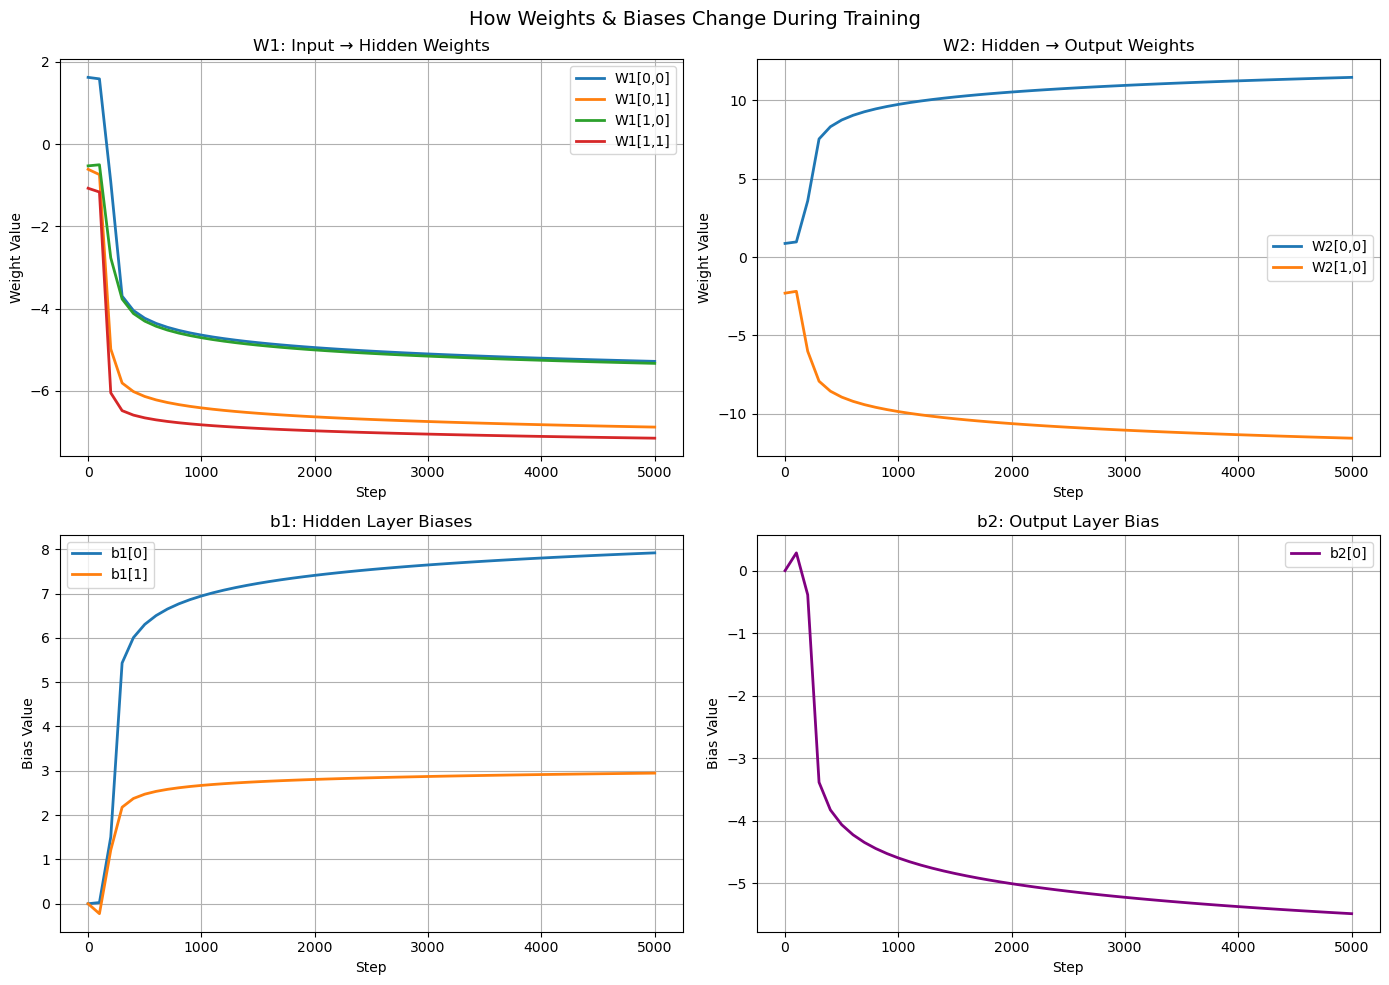

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
steps = np.arange(len(W1_history)) * 100

# Plot W1 weights (2x2 = 4 weights)
ax = axes[0, 0]
for i in range(2):
    for j in range(2):
        weights = [w[i, j] for w in W1_history]
        ax.plot(steps, weights, linewidth=2, label=f'W1[{i},{j}]')
ax.set_xlabel('Step')
ax.set_ylabel('Weight Value')
ax.set_title('W1: Input → Hidden Weights')
ax.legend()
ax.grid(True)

# Plot W2 weights (2x1 = 2 weights)
ax = axes[0, 1]
for i in range(2):
    weights = [w[i, 0] for w in W2_history]
    ax.plot(steps, weights, linewidth=2, label=f'W2[{i},0]')
ax.set_xlabel('Step')
ax.set_ylabel('Weight Value')
ax.set_title('W2: Hidden → Output Weights')
ax.legend()
ax.grid(True)

# Plot b1 biases (2 biases)
ax = axes[1, 0]
for j in range(2):
    biases = [b[0, j] for b in b1_history]
    ax.plot(steps, biases, linewidth=2, label=f'b1[{j}]')
ax.set_xlabel('Step')
ax.set_ylabel('Bias Value')
ax.set_title('b1: Hidden Layer Biases')
ax.legend()
ax.grid(True)

# Plot b2 bias (1 bias)
ax = axes[1, 1]
biases = [b[0, 0] for b in b2_history]
ax.plot(steps, biases, linewidth=2, label='b2[0]', color='purple')
ax.set_xlabel('Step')
ax.set_ylabel('Bias Value')
ax.set_title('b2: Output Layer Bias')
ax.legend()
ax.grid(True)

plt.suptitle('How Weights & Biases Change During Training', fontsize=14)
plt.tight_layout()
plt.show()